In [1]:
# 코드 5-12 라이브러리 호출
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-12-03 01:07:09.327440: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 01:07:09.331576: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 01:07:09.339593: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733155629.350406   86468 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733155629.353550   86468 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 01:07:09.370615: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# 코드 5-13 사전 훈련된 모델 내려받기
model = ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
)

W0000 00:00:1733155636.877611   86468 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# 코드 5-14 ResNet50 네트워크 구조 확인
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [4]:
# 코드 5-15 ResNet50 네트워크에 밀집층 추가
model.trainable = False

model = Sequential(
    [
        model,
        # 시그모이드 활성화 함수를 사용하여 2개의 노드를 가진 밀집층 추가
        Dense(2, activation="sigmoid"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1000)           │    25,636,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,638,714 (97.80 MB)

 Trainable params: 2,002 (7.82 KB)

 Non-trainable params: 25,636,712 (97.80 MB)

In [5]:
# 코드 5-16 훈련에 사용될 환경 설정
model.compile(
    # 이진 교차 엔트로피 손실 함수 사용
    loss="binary_crossentropy",
    # Adam 옵티마이저 사용
    optimizer="adam",
    # 정확도 측정
    metrics=["accuracy"],
)

In [6]:
# 코드 5-17 모델 훈련
BATCH_SIZE = 32
image_height = 224
image_width = 224
train_dir = "../chap5/data/catanddog/train"
valid_dir = "../chap5/data/catanddog/validation"

# 훈련 데이터에 대한 이미지 데이터 생성기 생성
train = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
)
# 폴더에서 이미지를 가져와서 배치로 변환
train_generator = train.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    seed=1,
    shuffle=True,
    class_mode="categorical",
)

# 검증 데이터에 대한 이미지 데이터 생성기 생성
valid = ImageDataGenerator(rescale=1.0 / 255.0)
# 폴더에서 이미지를 가져와서 배치로 변환
valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    seed=7,
    shuffle=True,
    class_mode="categorical",
)

# 모델 훈련
history = model.fit(
    train_generator, epochs=10, validation_data=valid_generator, verbose=2
)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


/home/halozhan/Study/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/home/halozhan/Study/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 - 14s - 1s/step - accuracy: 0.5273 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
13/13 - 9s - 718ms/step - accuracy: 0.5143 - loss: 0.6932 - val_accuracy: 0.5306 - val_loss: 0.6931
Epoch 3/10
13/13 - 9s - 723ms/step - accuracy: 0.5039 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
13/13 - 9s - 673ms/step - accuracy: 0.5273 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
13/13 - 9s - 701ms/step - accuracy: 0.5273 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
13/13 - 9s - 699ms/step - accuracy: 0.5273 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
13/13 - 9s - 682ms/step - accuracy: 0.5273 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
13/13 - 9s - 695ms/step - accuracy: 0.5273 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 9/10
13/13 - 9s - 707ms/step - accuracy: 0.5273 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 10/10
13

Text(0.5, 1.0, 'loss')

findfont: Font family 'Malgun Gothic' not found.


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

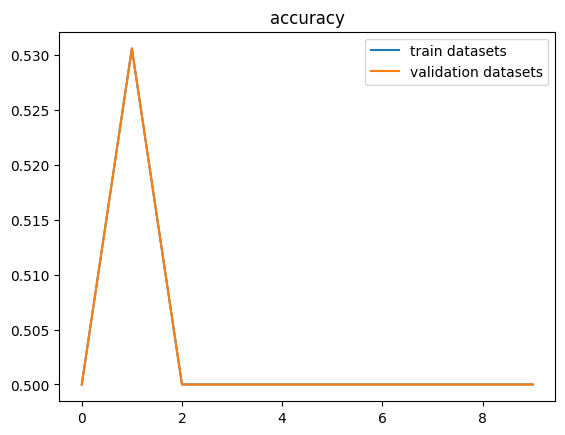

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

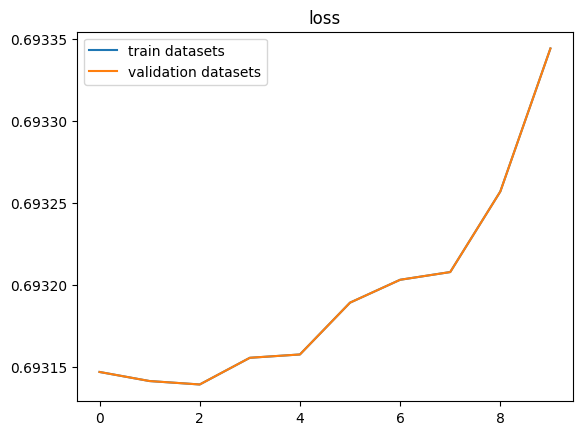

In [17]:
# 코드 5-18 모델의 정확도 시각화
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib import font_manager

# 주피터 노트북에서 한글이 깨지는 문제 해결
# font_fname = "C:/Windows/Fonts/malgun.ttf"
font_fname = "/mnt/c/Windows/Fonts/malgun.ttf"
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(accuracy))

# plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="train datasets")
# plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.plot(epochs, val_accuracy, label="validation datasets")
plt.legend()
# plt.title("정확도")
plt.title("accuracy")
plt.figure()

# plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="train datasets")
# plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.plot(epochs, val_loss, label="validation datasets")
plt.legend()
# plt.title("오차")
plt.title("loss")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.


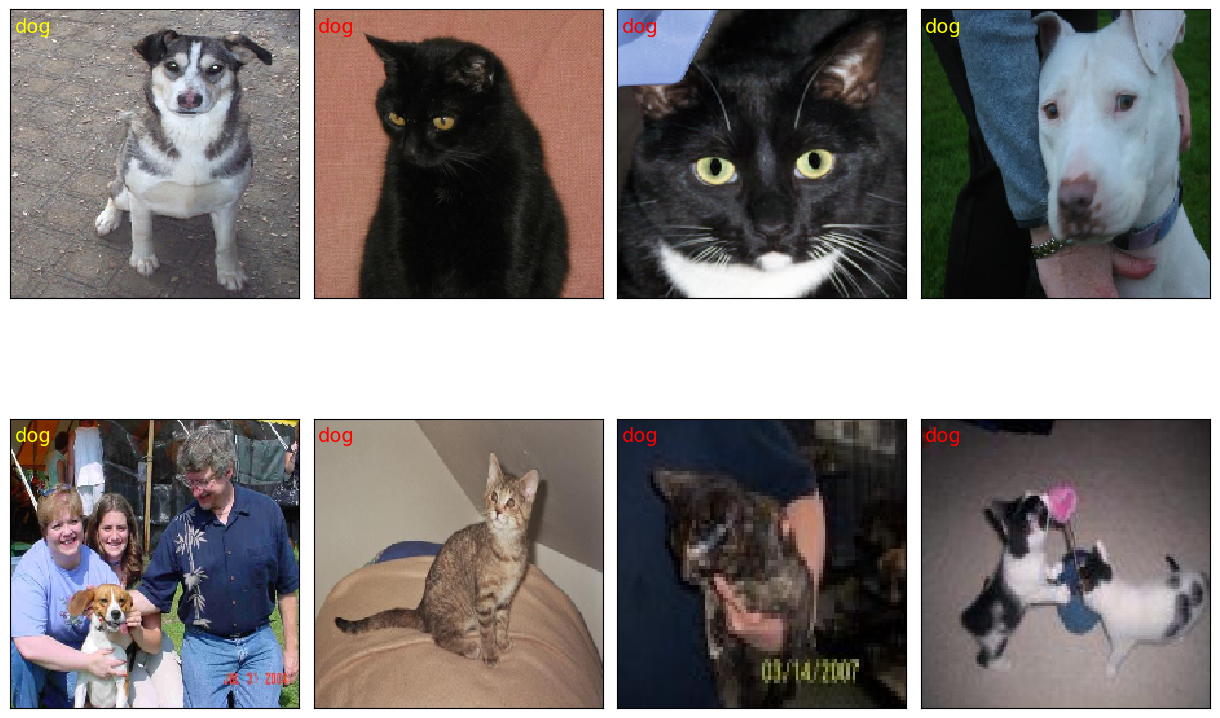

In [18]:
# 코드 5-19 훈련된 모델의 예측
class_names = ["cat", "dog"]  # 개와 고양이에 대한 클래스 두 개
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 이미지 여덟 개에 대해 출력
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i, :], cmap=plt.cm.gray_r, interpolation="nearest")
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color="yellow", fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color="red", fontsize=14)

# 텐서플로 허브 사용

In [19]:
%pip install tensorflow_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
# 코드 5-20 라이브러리 호출 및 ResNet50 내려받기
import tensorflow as tf
import tensorflow_hub as hub

model = tf.keras.Sequential(
    [
        tf.keras.layers.Lambda(
            lambda x: hub.KerasLayer(
                "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
            )(x),
            input_shape=(224, 224, 3),
        ),
        # 사전 훈련된 모델을 가져와서 밀집층(완전연결층)을 추가
        tf.keras.layers.Dense(2, activation="softmax"),
    ]
)

/home/halozhan/Study/.venv/lib/python3.10/site-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# 코드 5-21 데이터 확장
train = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
)

train_generator = train.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    seed=1,
    shuffle=True,
    class_mode="categorical",
)

valid = ImageDataGenerator(rescale=1.0 / 255.0)
valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    seed=7,
    shuffle=True,
    class_mode="categorical",
)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [22]:
# 코드 5-29 모델 훈련
history = model.fit(
    train_generator, epochs=10, validation_data=valid_generator, verbose=2
)

/home/halozhan/Study/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 - 14s - 1s/step - accuracy: 0.8052 - loss: 0.4672 - val_accuracy: 0.9490 - val_loss: 0.2352
Epoch 2/10
13/13 - 8s - 605ms/step - accuracy: 0.9662 - loss: 0.1873 - val_accuracy: 0.9694 - val_loss: 0.1168
Epoch 3/10
13/13 - 8s - 582ms/step - accuracy: 0.9714 - loss: 0.1171 - val_accuracy: 0.9694 - val_loss: 0.0839
Epoch 4/10
13/13 - 8s - 588ms/step - accuracy: 0.9688 - loss: 0.0905 - val_accuracy: 0.9898 - val_loss: 0.0743
Epoch 5/10
13/13 - 7s - 571ms/step - accuracy: 0.9844 - loss: 0.0794 - val_accuracy: 0.9898 - val_loss: 0.0672
Epoch 6/10
13/13 - 8s - 590ms/step - accuracy: 0.9766 - loss: 0.0672 - val_accuracy: 0.9898 - val_loss: 0.0623
Epoch 7/10
13/13 - 8s - 600ms/step - accuracy: 0.9896 - loss: 0.0436 - val_accuracy: 0.9898 - val_loss: 0.0592
Epoch 8/10
13/13 - 8s - 602ms/step - accuracy: 0.9922 - loss: 0.0453 - val_accuracy: 0.9796 - val_loss: 0.0553
Epoch 9/10
13/13 - 9s - 679ms/step - accuracy: 0.9922 - loss: 0.0427 - val_accuracy: 0.9898 - val_loss: 0.0536
Epo

Text(0.5, 1.0, '오차')

/home/halozhan/Study/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/halozhan/Study/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/halozhan/Study/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/halozhan/Study/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/halozhan/Study/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/halozhan/Study/.venv/lib/pytho

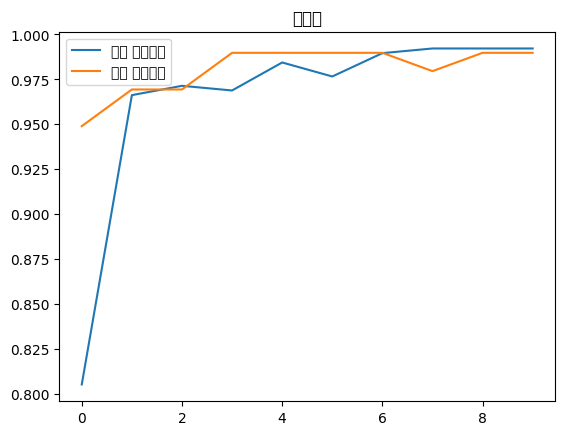

/home/halozhan/Study/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/halozhan/Study/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


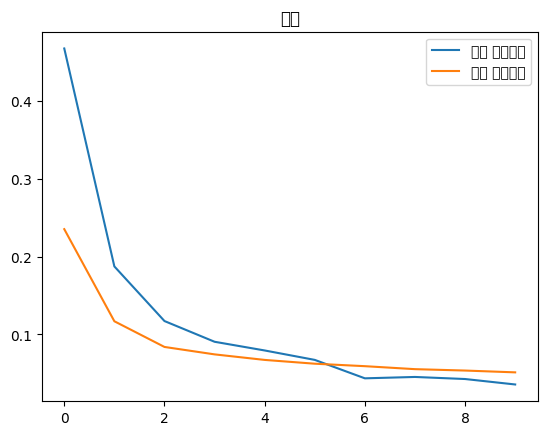

In [23]:
# 코드 5-30 모델의 정확도를 시각적으로 표현
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title("정확도")
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title("오차")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


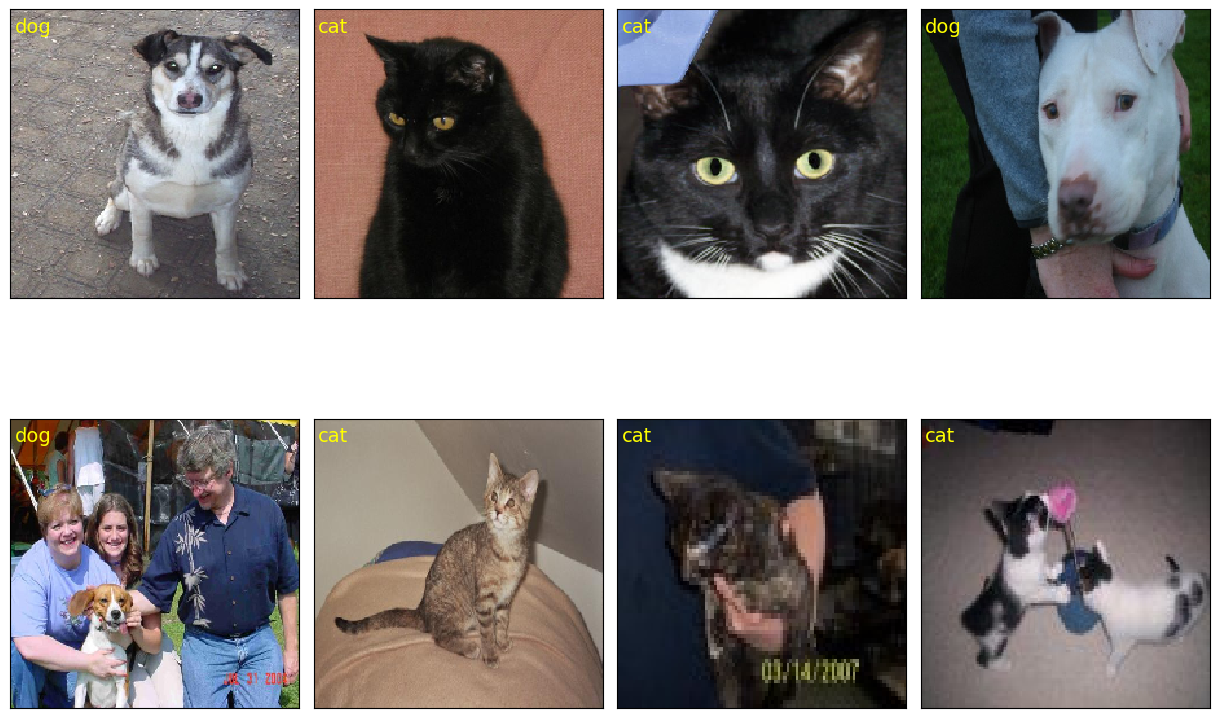

In [24]:
# 코드 5-31 이미지에 대한 예측 확인
class_names = ["cat", "dog"]
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i, :], cmap=plt.cm.gray_r, interpolation="nearest")
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color="yellow", fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color="red", fontsize=14)